In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline


import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from IPython.display import SVG, Image
print(tf.__version__)

2.17.0


In [6]:
train_dir='archive/train'
test_dir='archive/test'

In [7]:
def load_dataset(directory):
  image_paths=[]
  labels=[]

  for label in os.listdir(directory):
    for filename in os.listdir(directory+"/"+label):
      image_path=os.path.join(directory,label,filename)
      image_paths.append(image_path)
      labels.append(label)
    print(label,"compelted")

  return image_paths, labels

In [8]:
train=pd.DataFrame()
train['image'], train['label']=load_dataset(train_dir)

train=train.sample(frac=1).reset_index(drop=True)
train.head()

angry compelted
disgust compelted
fear compelted
happy compelted
neutral compelted
sad compelted
surprise compelted


,image,label
0,archive/train\happy\Training_71489691.jpg,happy
1,archive/train\angry\Training_2941397.jpg,angry
2,archive/train\surprise\Training_81495469.jpg,surprise
3,archive/train\happy\Training_93455860.jpg,happy
4,archive/train\neutral\Training_64296137.jpg,neutral


In [9]:
test=pd.DataFrame()
test['image'], test['label']=load_dataset(test_dir)
test.head()

angry compelted
disgust compelted
fear compelted
happy compelted
neutral compelted
sad compelted
surprise compelted


,image,label
0,archive/test\angry\PrivateTest_10131363.jpg,angry
1,archive/test\angry\PrivateTest_10304478.jpg,angry
2,archive/test\angry\PrivateTest_1054527.jpg,angry
3,archive/test\angry\PrivateTest_10590091.jpg,angry
4,archive/test\angry\PrivateTest_1109992.jpg,angry


In [15]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        # Use color_mode="grayscale" instead of grayscale=True
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Assuming images are 48x48
    return features


In [16]:
train_features=extract_features(train['image'])

100%|████████████████████████████████████████████████████████████████████████████| 28709/28709 [05:31<00:00, 86.53it/s]


In [17]:
test_features=extract_features(test['image'])

100%|██████████████████████████████████████████████████████████████████████████████| 7178/7178 [01:36<00:00, 74.02it/s]


In [18]:
x_train=train_features/255.0
x_test=test_features/255.0

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [20]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test, num_classes=7)

In [21]:
input_shape=(48,48,1)
output_class=7

In [22]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="Same", activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (5,5), padding="Same", activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5,5), padding="Same", activation='relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5,5), padding="Same", activation='relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [24]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Use learning_rate instead of lr
optimizer = Adam(learning_rate=0.0005)

lr_anneal = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.2, min_lr=1e-6)


In [25]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=50, batch_size = 100, callbacks=[lr_anneal])

Epoch 1/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 251s 846ms/step - accuracy: 0.2312 - loss: 2.2286 - val_accuracy: 0.2001 - val_loss: 1.8569 - learning_rate: 5.0000e-04
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.3071 - loss: 1.7205 - val_accuracy: 0.3596 - val_loss: 1.6388 - learning_rate: 5.0000e-04
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 245s 852ms/step - accuracy: 0.3995 - loss: 1.5463 - val_accuracy: 0.3923 - val_loss: 1.6582 - learning_rate: 5.0000e-04
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 248s 860ms/step - accuracy: 0.4504 - loss: 1.4277 - val_accuracy: 0.4916 - val_loss: 1.3240 - learning_rate: 5.0000e-04
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 232s 807ms/step - accuracy: 0.4879 - loss: 1.3396 - val_accuracy: 0.4702 - val_loss: 1.4033 - learning_rate: 5.0000e-04
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 220s 764ms/step - accuracy: 0.5077 - loss: 1.2772 - val_accuracy: 0.5199 - val_loss: 1.2398 - learning_rate: 5.0000e-04
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 209

288/288 ━━━━━━━━━━━━━━━━━━━━ 666s 2s/step - accuracy: 0.7756 - loss: 0.6180 - val_accuracy: 0.6588 - val_loss: 1.0464 - learning_rate: 2.0000e-05
Epoch 44/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 160s 554ms/step - accuracy: 0.7761 - loss: 0.6130 - val_accuracy: 0.6588 - val_loss: 1.0439 - learning_rate: 2.0000e-05
Epoch 45/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 166s 578ms/step - accuracy: 0.7805 - loss: 0.6065 - val_accuracy: 0.6577 - val_loss: 1.0470 - learning_rate: 2.0000e-05
Epoch 46/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 163s 566ms/step - accuracy: 0.7782 - loss: 0.5971 - val_accuracy: 0.6580 - val_loss: 1.0518 - learning_rate: 2.0000e-05
Epoch 47/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 170s 591ms/step - accuracy: 0.7766 - loss: 0.6069 - val_accuracy: 0.6574 - val_loss: 1.0498 - learning_rate: 4.0000e-06
Epoch 48/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 167s 581ms/step - accuracy: 0.7809 - loss: 0.5951 - val_accuracy: 0.6580 - val_loss: 1.0498 - learning_rate: 4.0000e-06
Epoch 49/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 173s 601

In [27]:
model.save('model3_softmax.h5')

In [28]:
predictions_model=model.predict(x_train)

898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step


In [29]:
y_features=model.predict(x_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step


In [30]:
valid_class=[]
for i in y_test:
    j=i.tolist()
    valid_class.append(j.index(1))
test_answers=np.array(valid_class)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
predicted_classes = np.argmax(y_features, axis=1)
# Calculate confusion matrix
cm = confusion_matrix(test_answers, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Optional: Calculate accuracy score
accuracy = accuracy_score(test_answers, predicted_classes)
print("Accuracy Score:", accuracy)

f1 = f1_score(test_answers, predicted_classes,average='macro')
print(f1)

Confusion Matrix:
[[ 520   12   68   45  125  163   25]
 [  25   64    7    3    3    6    3]
 [  95    6  416   34  128  235  110]
 [  27    0   19 1516  114   58   40]
 [  68    1   50   77  846  166   25]
 [ 105    1  111   54  268  689   19]
 [  19    0   57   44   19   17  675]]
Accuracy Score: 0.6584006687099471
0.6417210947431684


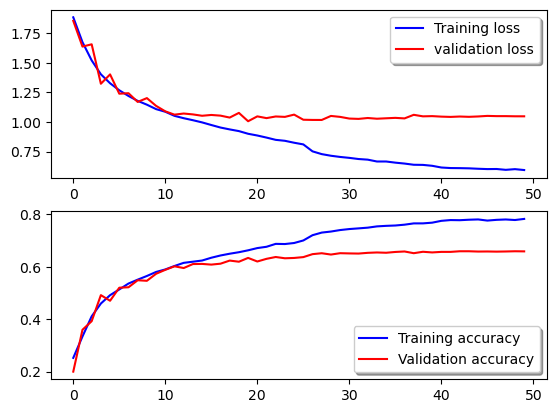

In [32]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step


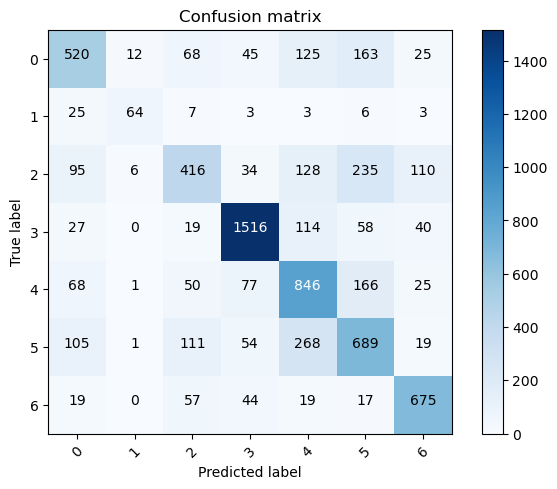

In [34]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [35]:
score, acc = model.evaluate(x_test, y_test, batch_size=100)
print('Test score:', score)
print("Test accuracy:", acc)

72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - accuracy: 0.5999 - loss: 1.2195
Test score: 1.0482501983642578
Test accuracy: 0.6584006547927856
